<div style="background-color:#96CDF2; padding:10px;color:#3B3C3E">
Licence <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">CC BY-SA</a>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0; float:right;" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png"/></a><br />
Germain Salvato Vallverdu - <tt>germain.vallverdu@univ-pau.fr</tt> <br />
<i><a href="http://iprem.univ-pau.fr/fr/index.html">IPREM</a> / <a href="http://www.univ-pau.fr/">Univ Pau &amp; Pays Adour</a></i>
</div>


# Initiation à la librairie Pandas

La [documentation officielle](https://pandas.pydata.org/pandas-docs/stable/index.html) de Pandas est le point de départ pour l'apprentissage de la librairie. En particulier vous pouvez consulter la page [10 minutes to pandas (en)](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) qui est une introduction à la librairie.

Cette initiation est écrite de sorte à pouvoir utiliser pandas avec peu de connaissances en python. On rappelle que pour exécuter une cellule d'un jupyter notebook, vous devez exécuter les touches control ou majuscule ou command + entrée. La plupart des cellules sont déjà remplies. Certaines sont laissées vides pour que vous puissiez faire vos propres essais tout au long de ce notebook. Par ailleurs, il est vivement conseillé de consulter la documentation de toutes les fonctions utilisées : soit en ligne sur la documentation de pandas, soit en plaçant un point d'intérogation à la place des parenthèses, la documentation s'affichera alors dans le notebook.

## Chapitre 3 : Représentation graphique

Ce troisième chapitre permet de découvrir comment produire des représentations graphiques à partir d'une `DataFrame` pandas. Ce chapitre ne peut être exhaustif. Il a pour but de donner quelques exemples pour démarrer et ne peut se substituer aux documentations des diverses librairies graphiques disponibles dans python qui sont riches et nombreuses. Chaque librairie dispose de sa propre gallerie d'exemples que vous pouvez aussi consulter. En voici une liste non exhaustive :
* [matplotlib](https://matplotlib.org/), la librairie de base, sur laquelle se base pandas pour produire des graphiques
* [seaborn](https://seaborn.pydata.org/index.html), basée également sur matplotlib, elle dispose de fonctions de haut niveau permettant à partir d'une `DataFrame` de créer facilement des graphiques complexes.
* [plotly](https://plotly.com/python/) (ou [plotly express](https://plotly.com/python/plotly-express/)), basés sur d3js. Permet de construire des graphiques interactifs, facilement distribuable en ligne.
* parmi d'autres : [bokeh](https://bokeh.org/), [holoview](https://holoviews.org/)

Vous pouvez également consulter [The Data Visualisation Catalogue](https://datavizcatalogue.com/) et [The python Graph Gallery](https://python-graph-gallery.com/) qui sont des sources d'exemples de représentations graphiques.

Pour chaque type de graphique, nous commencerons par utiliser la méthode `plot()` d'une `DataFrame`. Puis nous verrons comment enrichir le graphique avec `seaborn` ou `plotly`.

Dans ce chapitre il est indispensable de regarder la documentation des diverses fonctions permettant de produire les graphiques. Vous pouvez y accéder depuis le notebook en ajoutant un point d'intérogation.


### Sommaire

* [1. Graphique de type scatter](#1.-Graphique-de-type-scatter)
* [2. Graphique de type bar](#2.-Graphique-de-type-bar)
* [3. Distributions](#3.-Distributions)
    * [3.1 Histogrammes](#3.1-Histogrammes)
    * [3.2 KDE](#3.2-KDE)
    * [3.3 boxplot](#3.3-Boxplot)
    * [3.4 violin plot](#3.4-Violinplot)
* [4. Pie-Chart, donuts ou cammenbert](#4.-Pie-chart,-donuts-ou-cammenbert)
---

En premier lieu, il est nécessaire d'importer certaines librairies et en particulier la librairie `pandas`. On importe également la librairie `numpy` (Numerical Python). Voici la façon usuelle d'importer ces deux librairies en leur donnant des noms plus courts, par commodité, `pd` pour `pandas` et `np` pour `numpy`.  Les modules `requests` et `io` seront utilisés pour lire les données depuis internet.

In [1]:
import numpy as np
import pandas as pd

# modules complémentaires pour lire les données depuis internet
import requests
import io

Nous allons également importer matplotlib et modifier quelques paramètres pour augmenter la taille des figures et de la police :

In [2]:
# cette ligne permet d'intégrer les graphiques au notebook
%matplotlib inline

import matplotlib.pyplot as plt

# paramètres
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 20

Enfin, on importe les librairies seaborn et plotly express :

In [3]:
import seaborn as sns
import plotly.express as px

## Chargement des données

Nous allons utiliser les données sur les huitres que nous avons utilisé au chapitre précédent :

In [4]:
url = "https://gitlab.com/gvallverdu/cours-python/-/raw/master/notebooks/pandas/preparation/data/HUITRES_PERLIERES_2018_2019.csv"
download = requests.get(url).content

df = pd.read_csv(
    io.StringIO(download.decode('latin1')), 
    decimal=",",
    sep=";",
)
# affichage des premières lignes
df.head()

Huitre   ZONE VARIETE  PROFONDEUR  LONGUEUR  EPAISSEUR  POIDS SUCCES
0       1  Zone1       A          10       9.2        3.4   89.0    Non
1       2  Zone2       B           9      12.0        1.3  118.0    Non
2       3  Zone1       A           6       8.6        3.4   91.0    Oui
3       4  Zone1       A           9       8.4        2.2  100.0    Non
4       5  Zone1       A           9       9.8        3.2   91.0    Oui

Le jeu de données comporte quelques lignes avec des valeurs de longueur erronnées : 

In [5]:
df[df.LONGUEUR > 20]

Huitre   ZONE VARIETE  PROFONDEUR  LONGUEUR  EPAISSEUR  POIDS SUCCES
68       69  Zone1       B           6      91.0        2.7  110.0    Non
391     392  Zone3       B           6     105.0        1.9   99.0    Non

On supprime ces valeurs :

In [6]:
df.drop(labels=[68, 391], axis="index", inplace=True)

On peut se donner un premier apperçu des données avec la fonction `scatter_matrix` :

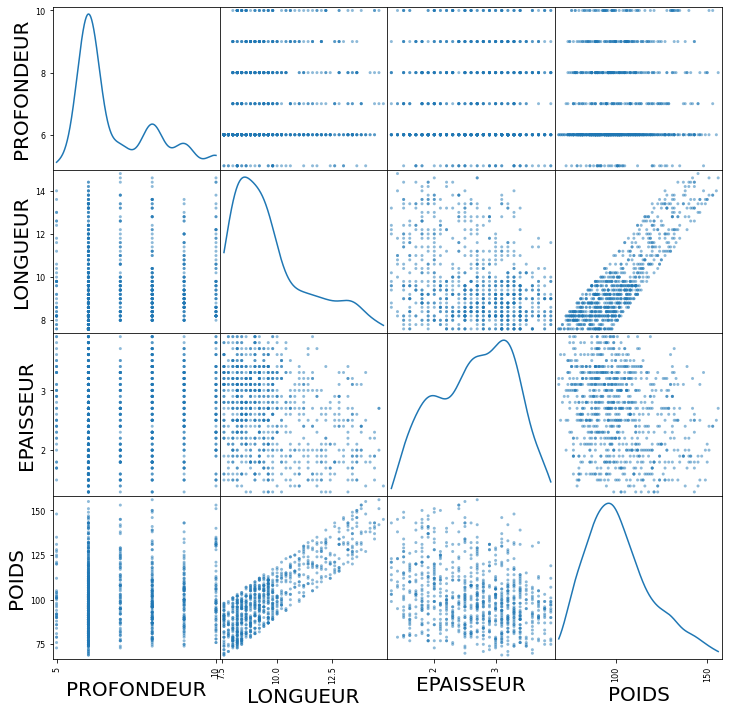

In [7]:
pd.plotting.scatter_matrix(
    df[["PROFONDEUR", "LONGUEUR", "EPAISSEUR", "POIDS"]], 
    diagonal="kde", 
    figsize=(12, 12)
);

## 1. Graphique de type scatter

Sur un graphique de type `scatter` on choisit une colonne pour les valeurs de `x` et une pour les valeurs de `y`. Par exemple :

<AxesSubplot:xlabel='EPAISSEUR', ylabel='LONGUEUR'>

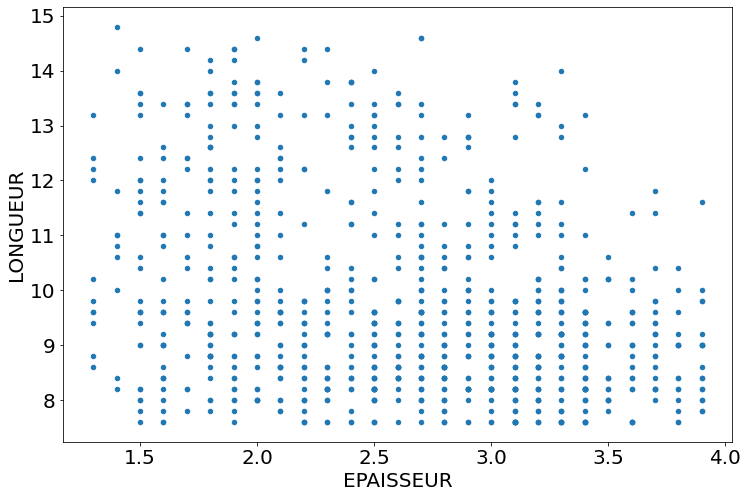

In [8]:
df.plot.scatter(y="LONGUEUR", x="EPAISSEUR")
# ou
# df.plot(y="LONGUEUR", x="EPAISSEUR", kind="scatter")

Afficher la documentation des graphiques de type `scatter`, il est possible de changer la couleur des points et la taille des points suivant d'autres colonnes du tableau. Par exemple :

<AxesSubplot:title={'center':'Huitres perlières'}, xlabel='EPAISSEUR', ylabel='LONGUEUR'>

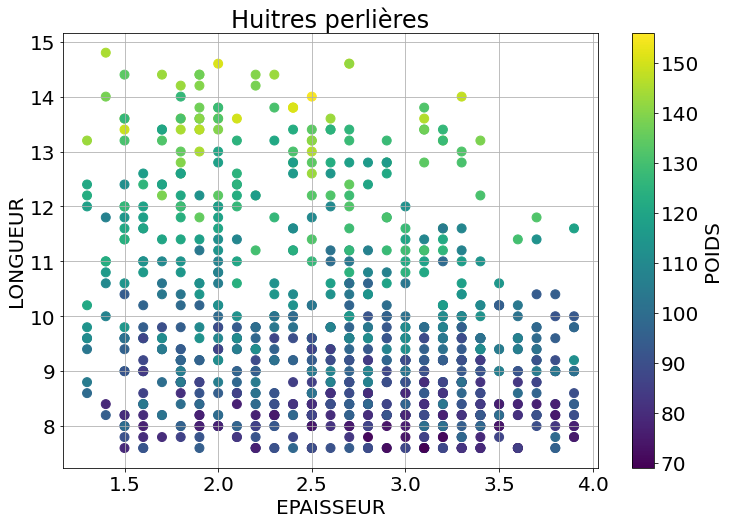

In [14]:
df.plot.scatter(
    y="LONGUEUR", x="EPAISSEUR",
    c="POIDS",
    s=80,
    figsize=(12, 8),
    cmap="viridis",
    title="Huitres perlières",
    grid=True,
    # cette dernière ligne permet de corriger un bug faisant disparaitre l'axe x
    sharex=False,
)

Avec seaborn, la fonction est plus souple et permet par exemple d'utiliser les colonnes `ZONE` ou `SUCCES` directement :

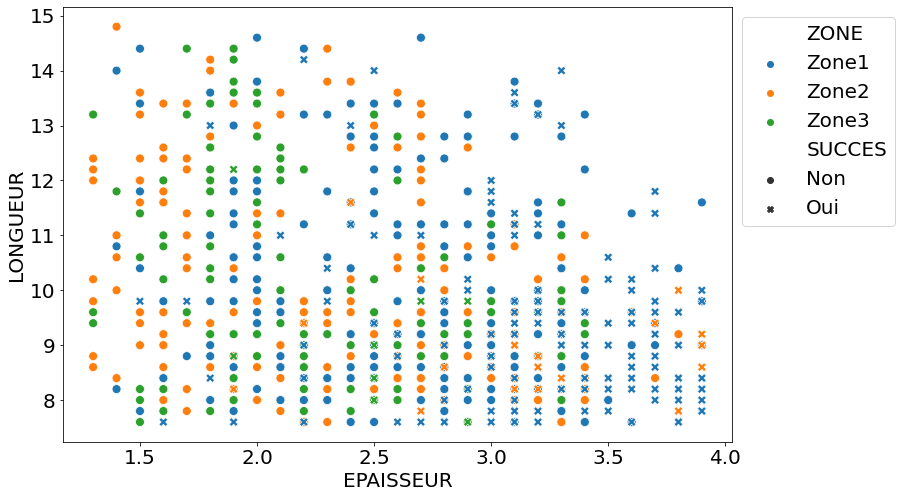

In [24]:
sns.scatterplot(
    data=df, 
    s=80,
    x="EPAISSEUR", y="LONGUEUR", 
    hue="ZONE", style="SUCCES",
)
# pour déplacer la légende à l'extérieur
plt.legend(bbox_to_anchor=(1., 1), loc="upper left")

La fonction `scatter` de plotly express fonctionne un peu de la même manière.

In [143]:
px.scatter(
    data_frame=df, 
    x="EPAISSEUR", y="LONGUEUR",
    color="ZONE", symbol="SUCCES",
    hover_name="PROFONDEUR",
    symbol_sequence=["circle", "cross"],
    template="simple_white"
)

Avec `plotly`, on peut directement ajouter une couche d'interactivité via l'argument `animation_frame`. Comme exemple, on rajoute ici une information sur la profondeur.

In [162]:
px.scatter(
    # on se limite au profondeur <= 8 car pour 9 et 10 on ne dispose pas
    # de données pour les trois zones
    data_frame=df[df.PROFONDEUR <= 8].sort_values(by="PROFONDEUR"),
    x="EPAISSEUR", y="POIDS",
    color="ZONE", symbol="SUCCES",
    symbol_sequence=["circle", "cross"],
    animation_frame="PROFONDEUR",
    template="simple_white"
)

## 2. Graphique de type `bar`

Les graphiques de type `bar` ou `barh` produisent des diagrammes en bares. Voici un exemple d'utilisation couplée avec une opération `groupby`. On commence par grouper les lignes suivant la colonne `SUCCES` et on compte le nombre de données de la colonne `Huitre`. On utilise ces données pour construire le graphique.

In [180]:
df2 = df.groupby("SUCCES").agg({"Huitre": "count"})
df2

Huitre
SUCCES        
Non        588
Oui        310

<AxesSubplot:xlabel='SUCCES'>

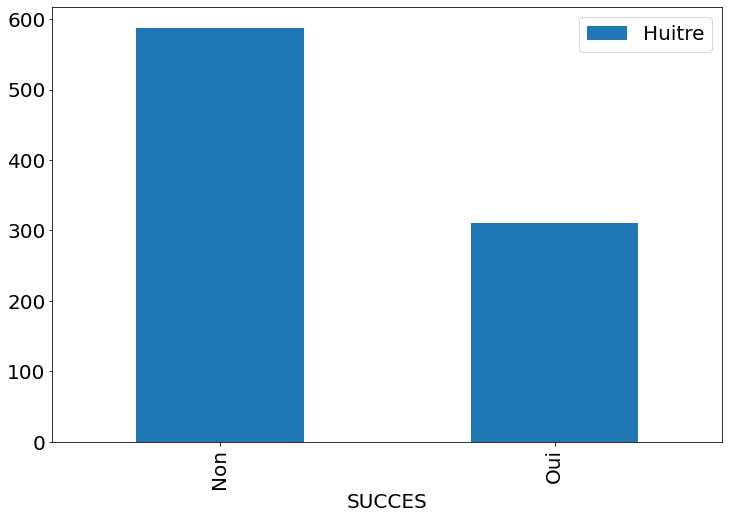

In [181]:
df2.plot(kind="bar")

Le diagramme `barh` est un équivalent avec des barres horizontales. On applique la même stratégie, avec un `groupby` mais sans passer par un tableau intermédiaire.

<AxesSubplot:ylabel='SUCCES,VARIETE'>

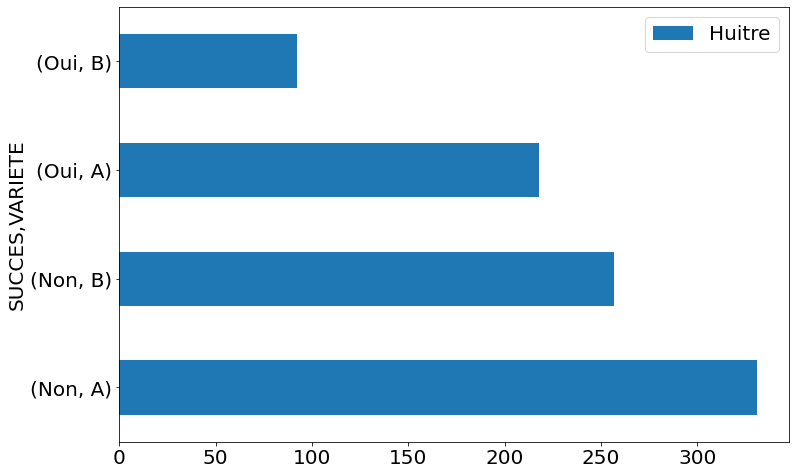

In [53]:
df.groupby(["SUCCES", "VARIETE"]).agg({"Huitre": "count"}).plot(kind="barh")

Avec seaborn, l'opération `groupby` est intégrée.

<AxesSubplot:xlabel='VARIETE', ylabel='LONGUEUR'>

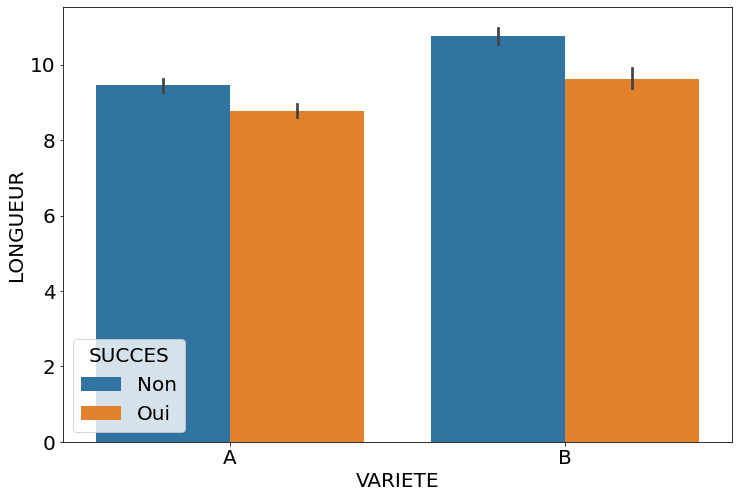

In [63]:
sns.barplot(data=df, x="VARIETE", hue="SUCCES", y="LONGUEUR")

<AxesSubplot:xlabel='LONGUEUR', ylabel='VARIETE'>

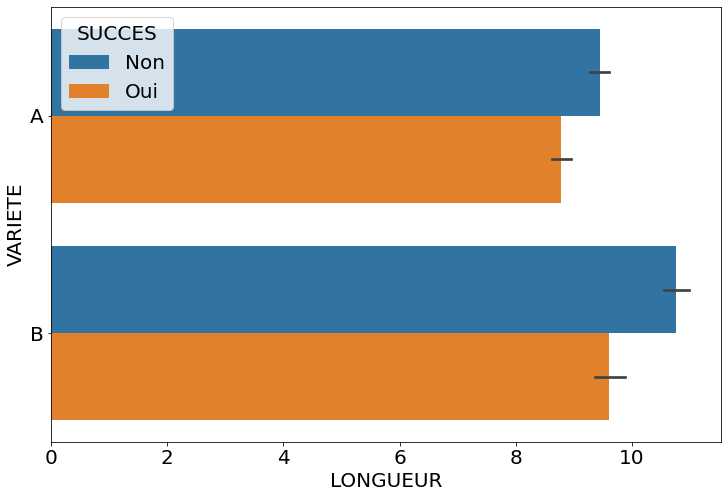

In [66]:
sns.barplot(data=df, y="VARIETE", hue="SUCCES", x="LONGUEUR")

Les colonnes `ZONE`, `VARIETE` ou `SUCCES` correspondent à des variables qualitatives. Dans ce cas, l'utilisation de `sns.catplot` est très efficace. Voici une visualisation de la table de pilote créée au chapitre précédent pour compter le nombre d'huitres ayant produit une perle en fonction de la zone et de la variété.

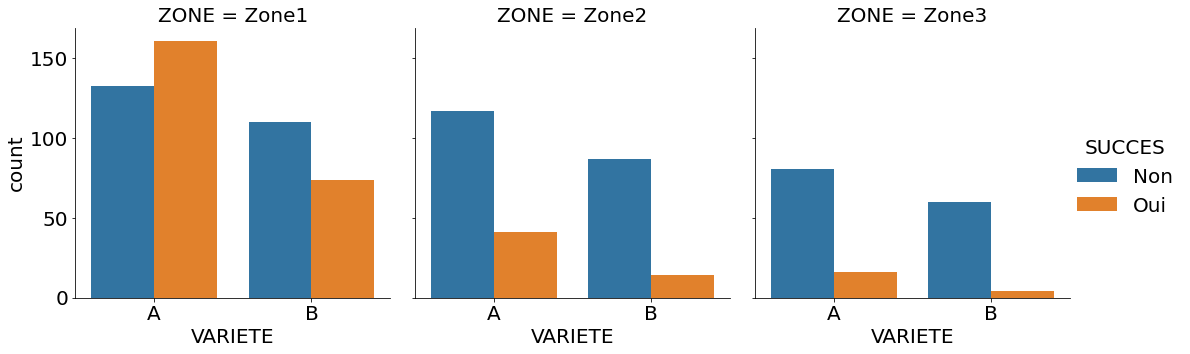

In [65]:
sns.catplot(data=df, x="VARIETE", hue="SUCCES", col="ZONE", kind="count")

## 3. Distributions

Il existe plusieurs manières de représenter une distribution. Nous allons en voir quelques unes parmi :
* un histogramme : nombre de valeurs dans un intervalle (classe)
* une KDE : *kernel density approximation*, une approximation continue de l'histogramme
* un boxplot ou boîte à moustaches
* un violin plot

Les deux derniers sont des représentations pratiques pour comparer des distributions.

[Cette page](https://www.autodesk.com/research/publications/same-stats-different-graphs) reporte une étude intéressante sur le lien entre descripteurs statistiques et représentation graphique.

### 3.1 Histogrammes

<AxesSubplot:ylabel='Frequency'>

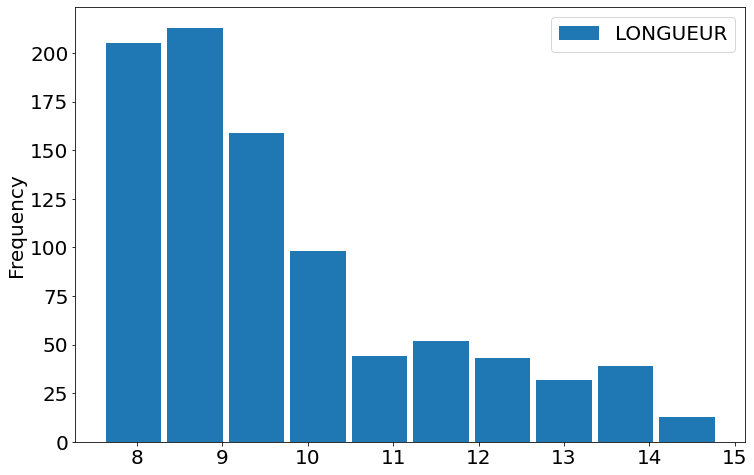

In [86]:
df[["LONGUEUR"]].plot.hist(rwidth=.9)

<AxesSubplot:ylabel='Frequency'>

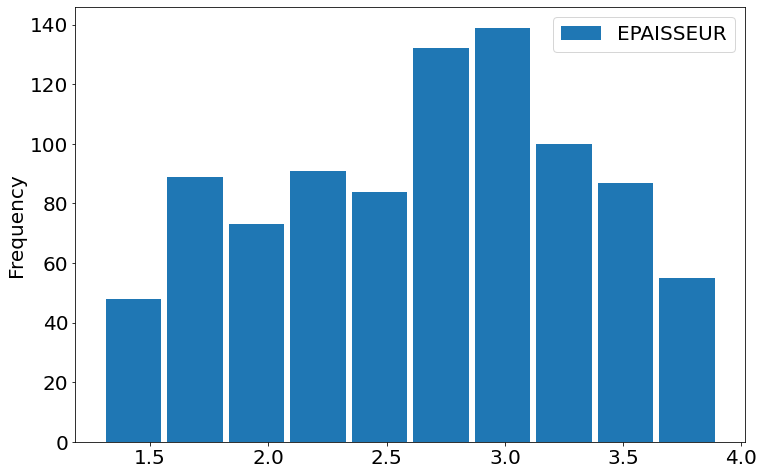

In [88]:
df[["EPAISSEUR"]].plot.hist(rwidth=.9)

Avec plotly express, il est possible de combiner plusieurs colonnes et d'afficher un boxplot au dessus de l'histogramme :

In [107]:
px.histogram(
    data_frame=df, 
    x="EPAISSEUR", color="SUCCES", facet_col="VARIETE",
    marginal="box",
    nbins=20,
    template="simple_white"
)

### 3.2 KDE

KDE pour *Kernel Density Approximation* est une approximation d'un histogramme par une fonction continue. Une des façons de l'obtenir est de faire une somme de fonctions gaussiennes au lieu de construire un histogramme. La largeur de ces gaussiennes est un des paramètres lors de la construction de ces fonctions.

Un des avantages est qu'il est plus facile de superposer des KDE que des histogrammes.

<AxesSubplot:title={'center':'Kernel Density Approximation'}, ylabel='Density'>

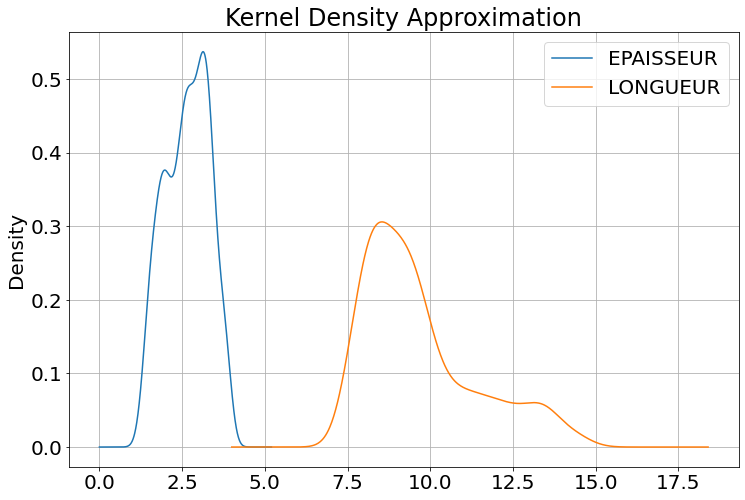

In [90]:
df[["EPAISSEUR", "LONGUEUR"]].plot.kde(grid=True, title="Kernel Density Approximation")

Avec `seaborn` et `displot` on peut compléter les graphiques. Par exemple, on peut superposer l'histogramme et la courbe KDE.

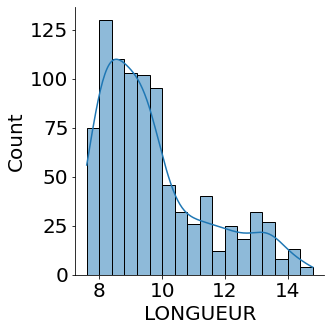

In [96]:
sns.displot(data=df, x="LONGUEUR", kde=True)

On peut explorer les données en utilisant plusieurs colonnes et des variables qualitatives :

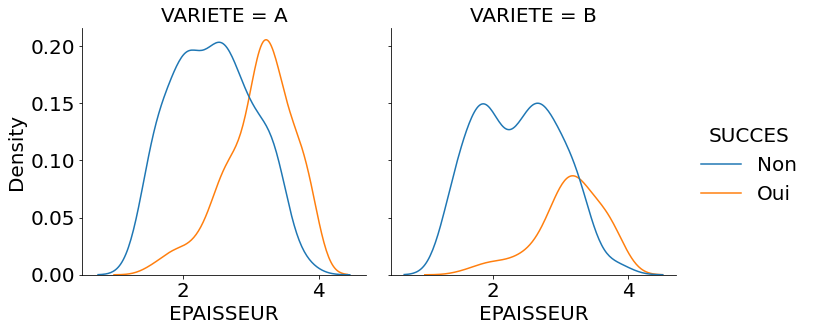

In [100]:
sns.displot(data=df, x="EPAISSEUR", hue="SUCCES", kind="kde", col="VARIETE")

### 3.3 Boxplot

Regardons directement les boxplots avec `seaborn` ou `plotly`.

Un boxplot donne une image de la distribution en représentant les quartiles sous la forme d'un rectangle : 25%, 50% (la médiane) et 75% ; et l'étendue de la distribution sous forme de barres d'incertitudes.

<AxesSubplot:xlabel='ZONE', ylabel='LONGUEUR'>

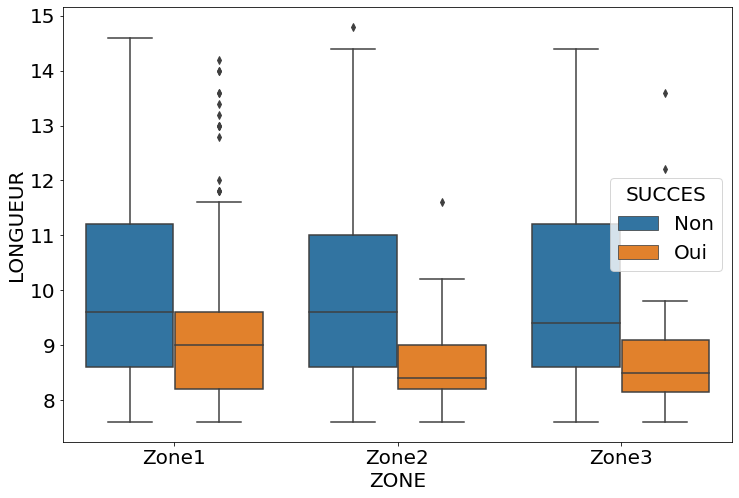

In [112]:
sns.boxplot(
    data=df,
    x="ZONE", y="LONGUEUR",
    hue="SUCCES",
)

L'équivalent avec `plotly` s'obtient de la façon suivante :

In [131]:
px.box(
    data_frame=df, 
    x="ZONE", y="LONGUEUR", color="SUCCES", notched=True,
    template="simple_white"
)

Une autre version en incluant la variété :

In [135]:
px.box(
    data_frame=df, 
    x="ZONE", y="LONGUEUR", color="VARIETE",
    facet_col="SUCCES",
    template="simple_white"
)

### 3.4 Violinplot

Dans ce cas aussi, regardons directement les violin plots avec `seaborn` ou `plotly`. Les violin plots représentent la distribution, sous la forme d'une KDE (vue précédemment). L'avantage par rapport au boxplot est que l'on a un apperçu de la distribution et pas seulement les descripteurs statistiques. De plus, un boxplot peut être affiché à l'intérieur.

<AxesSubplot:xlabel='ZONE', ylabel='LONGUEUR'>

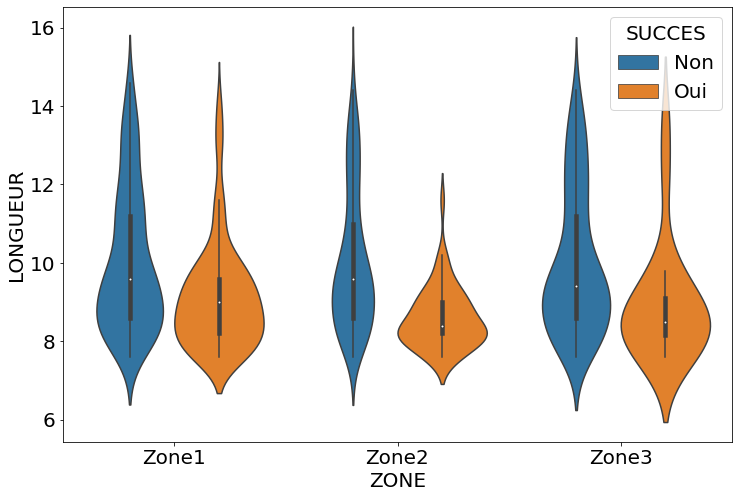

In [119]:
sns.violinplot(
    data=df,
    x="ZONE", y="LONGUEUR",
    hue="SUCCES",
    inner="box",
)

Un autre exemple avec :
* une représentation des quartiles à l'intérieur
* les violons découpées en deux faces pour les deux valeurs de `SUCCES`
* une orientation horizontale

<AxesSubplot:xlabel='EPAISSEUR', ylabel='ZONE'>

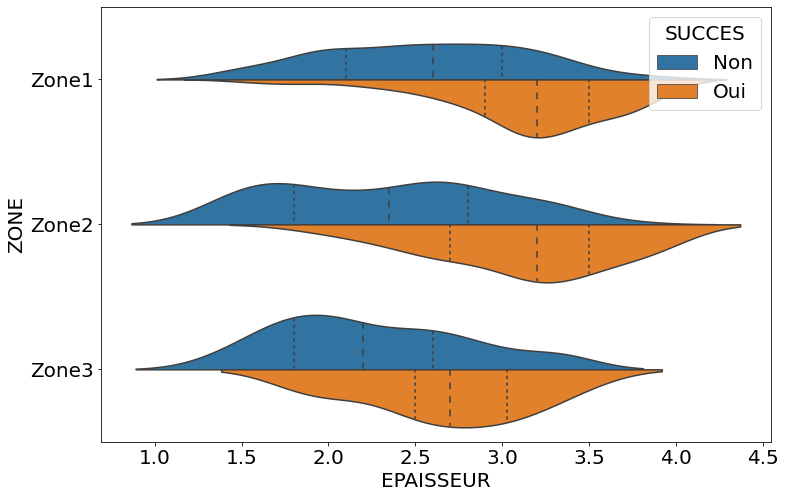

In [125]:
sns.violinplot(
    data=df,
    y="ZONE", x="EPAISSEUR",
    hue="SUCCES",
    inner="quartile",
    split=True,
)

Voici encore un équivalent avec `plotly`.

In [160]:
px.violin(
    data_frame=df, 
    x="ZONE", y="LONGUEUR", color="SUCCES",
    points=False, box=True,
    template="simple_white"
)

## 4. Pie chart, donuts ou cammenbert

Voici un exemple de diagramme de type cammembert. La forme *donuts* est à préférer car plus lisible, l'oeil humain étant moins sensible aux angles qu'aux longueurs.

Comme pour le diagramme en barres, on commence par grouper les valeurs, avec une instruction `groupby`, puis on construit un graphique de type `pie` en sélectionnant une colonne, ici `Huitre`.

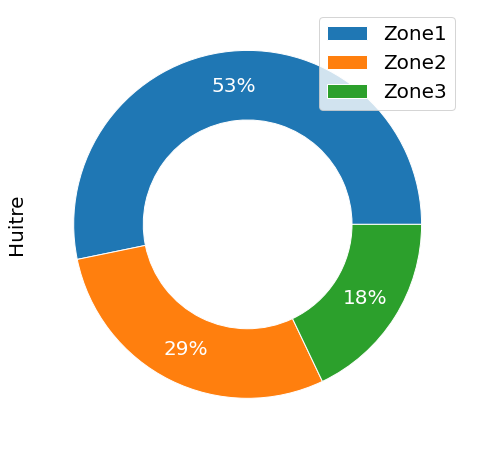

In [183]:
df.groupby("ZONE").count().plot.pie(
    y="Huitre", 
    # width donne la largeur du donuts
    wedgeprops=dict(width=.4, edgecolor="white"),
    # les trois paramètre suivants controlent le format, la couleur et la position du label
    autopct="%.0f%%",
    textprops=dict(color="white"),
    pctdistance=.8,
);

Un équivalent en utilisant `plotly.express`, l'avantage est que l'opération `groupby` est faite automatiquement.

In [192]:
px.pie(data_frame=df, names="ZONE", hole=.5, template="simple_white")

<div class="alert alert-success">

À vous de jouer. Changez les colonnes, utilisez un autre jeu de données, expérimentez d'autres représentations et inspirez vous des exemples disponibles sur toutes les galeries en ligne.
</div>